In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
import wrappers
import test_utils
import itertools

In [3]:
def plot_scores(T, X, L, score_clf, score_reg, xlim=None):

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(X, linewidth=3, label='Original signal', color='#6600FF')
    for t in T[L == 1]:
        plt.plot([t]*2, [X.min(), X.max()], color='0', linestyle='--', linewidth=2)
    plt.ylim(X.min(), X.max())
    plt.xlim(0, T.max())
    plt.xticks(size=20)
    plt.yticks([], size=20)
    plt.legend(loc='upper left', fontsize=20)
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])

    plt.subplot(2, 1, 2)
    plt.plot(score_clf, linewidth=8, label="ONNC", color='#FFCC33')
    plt.plot(score_reg, linewidth=4, label="ONNR", color='#FF001A', linestyle='-')
    s_max = max(score_reg.max(), score_clf.max())+1
    #s_max = max(s_max, 5)
    s_min = min(score_reg.min(), score_clf.min())-0.1
    for t in T[L == 1]:
            plt.plot([t]*2, [-1, s_max], color='0', linestyle='--', linewidth=2)
    plt.ylim(s_min, s_max)
    plt.xlim(0, T.max())
    plt.xticks(size=20)
    plt.yticks(np.arange(0, s_max, 2), size=20)
    plt.xlabel(r"$t$", size=20)
    plt.ylabel(r"$\bar{d}(t)$", size=20)
    plt.legend(loc='upper left', fontsize=20)
    if xlim is not None:
        plt.xlim(xlim[0], xlim[1])

    plt.tight_layout()

# Mean jumps

In [4]:
afile = "../data/synthetic_dataset_1/sample_3.csv"

model = wrappers.OnlineCLF(lag_size=100, height=.1)
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=10, margin=50, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=100, height=.1)
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=10, margin=50, sigma=0)

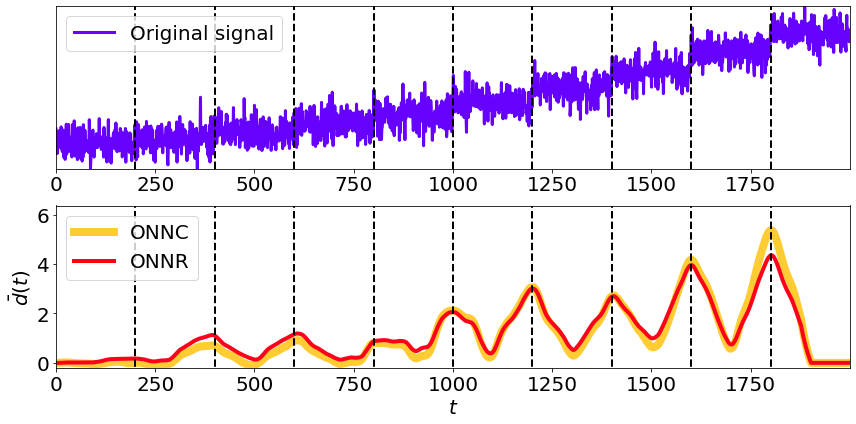

In [5]:
X = t_clf.X
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
plt.savefig(fname="images/mean_jumps.pdf", format="pdf")
plt.savefig(fname="images/mean_jumps.png", dpi=300, format="png")
plt.show()

# Var jumps

In [18]:
afile = "../data/synthetic_dataset_2/sample_4.csv"

model = wrappers.OnlineCLF(lag_size=100, height=.1)
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=10, margin=50, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=100, height=.1)
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=10, margin=50, sigma=0)

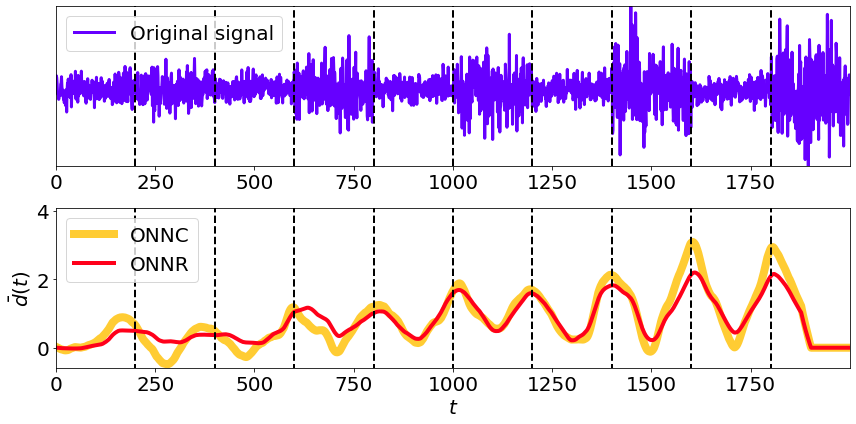

In [19]:
X = t_clf.X
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
plt.savefig(fname="images/var_jumps.pdf", format="pdf")
plt.savefig(fname="images/var_jumps.png", dpi=300, format="png")
plt.show()

# Kepler

In [8]:
afile = "../data/kepler/kepler_2617.csv"

model = wrappers.OnlineCLF(lag_size=20, height=1.1)
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=5, margin=20, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=20, height=1.1)
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=5, margin=20, sigma=0)

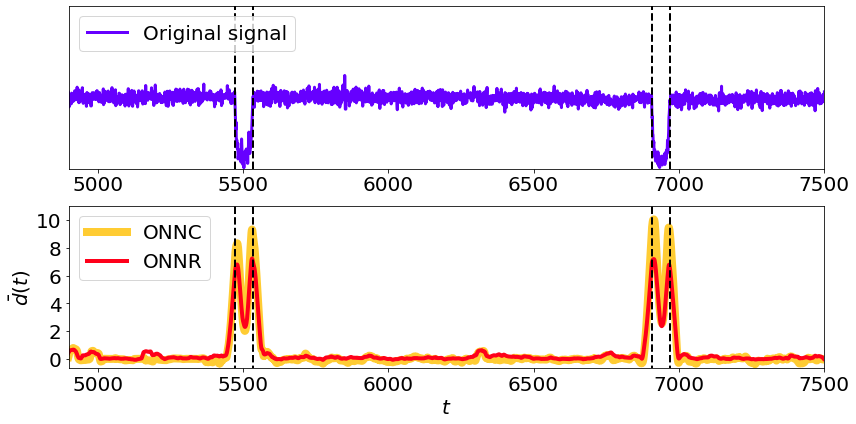

In [9]:
X = t_clf.X
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg, xlim=[4900, 7500]) 
plt.savefig(fname="images/kepler.pdf", format="pdf")
plt.savefig(fname="images/kepler.png", dpi=300, format="png")
plt.show()

# Higgs

In [10]:
afile = "../data/higgs/sample_5.csv"

model = wrappers.OnlineCLF(lag_size=200, height=.1)
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=5, margin=50, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=200, height=.1)
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=5, margin=50, sigma=0)

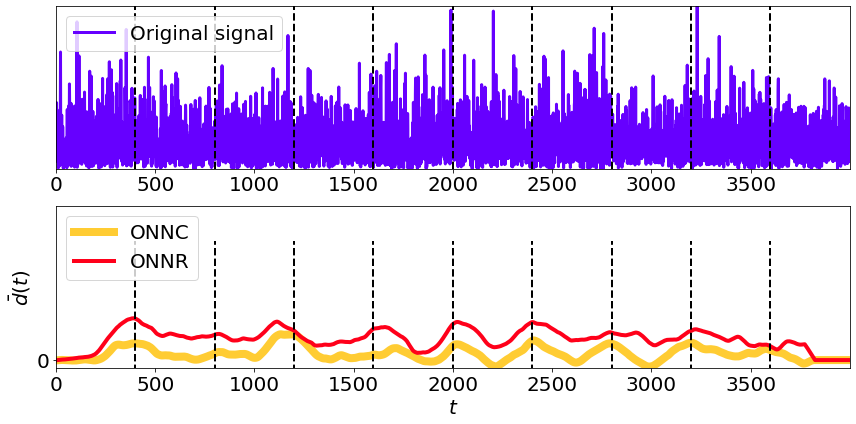

In [11]:
X = t_clf.X[:, 0]
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
#plt.yticks(np.arange(0, s_max, 1), size=20)
plt.ylim(-0.1, 2)
plt.savefig(fname="images/higgs.pdf", format="pdf")
plt.savefig(fname="images/higgs.png", dpi=300, format="png")
plt.show()

# EMG

In [12]:
afile = "../data/EMG_Physical_Action_Data_Set/sample_3.csv"

model = wrappers.OnlineCLF(lag_size=100, height=.1)
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=50, margin=50, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=100, height=.1)
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=50, margin=50, sigma=0)

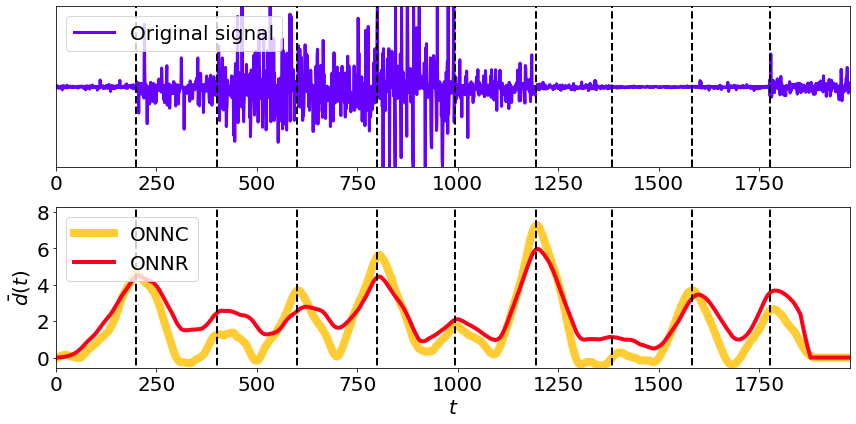

In [13]:
X = t_clf.X[:, 0]
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
plt.savefig(fname="images/emg.pdf", format="pdf")
plt.savefig(fname="images/emg.png", dpi=300, format="png")
plt.show()

# WISDM

In [20]:
afile = "../data/wisdm/sample_1.csv"

model = wrappers.OnlineCLF(lag_size=100, height=.1)
model.params = itertools.product([1], [1], [5], [0.01], [1])
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=20, margin=50, sigma=0)

model = wrappers.OnlineRuLSIF(lag_size=100, height=.1)
model.params = itertools.product([1], [1], [5], [0.01], [1])
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=20, margin=50, sigma=0)

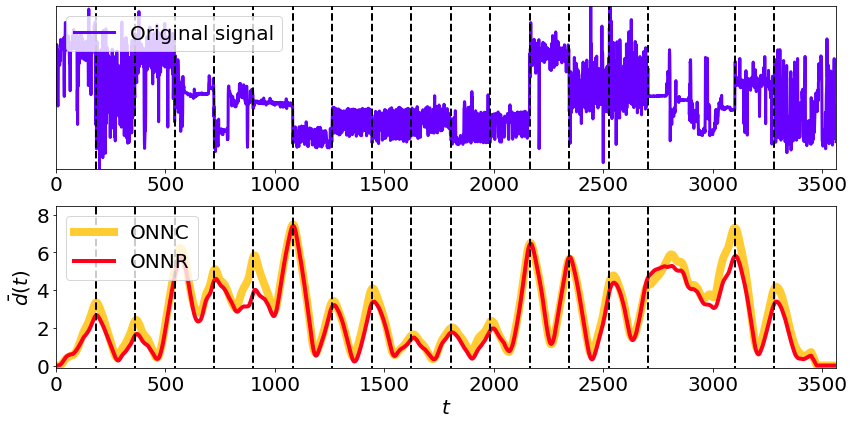

In [21]:
X = t_clf.X[:, 0]
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
plt.savefig(fname="images/wisdm.pdf", format="pdf")
plt.savefig(fname="images/wisdm.png", dpi=300, format="png")
plt.show()

# HTRU2

In [27]:
afile = "../data/htru2/sample_1.csv"

model = wrappers.OnlineCLF(lag_size=100, height=.1)
model.params = itertools.product([10], [10], [10], [0.01], [1])
t_clf = test_utils.Tester()
t_clf.run(afile, model, downsample=10, margin=50, sigma=5)

model = wrappers.OnlineRuLSIF(lag_size=100, height=.1)
model.params = itertools.product([10], [10], [10], [0.01], [1])
t_reg = test_utils.Tester()
t_reg.run(afile, model, downsample=10, margin=50, sigma=5)

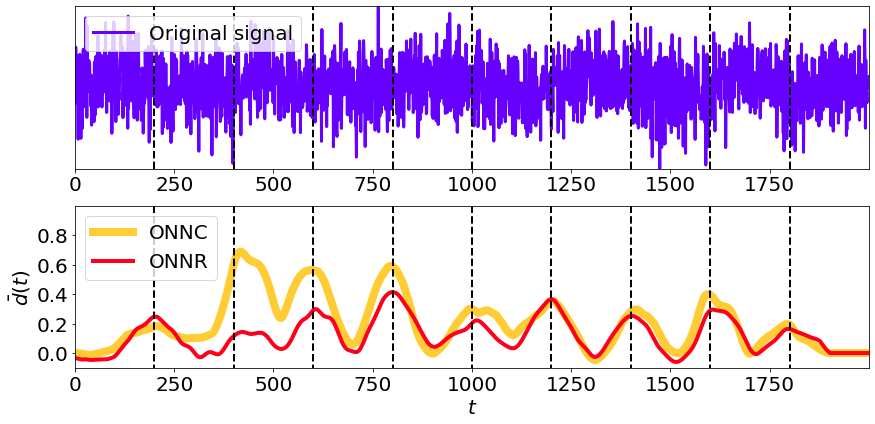

In [31]:
X = t_clf.X[:, 0]
T = t_clf.T
L = t_clf.label
score_clf = t_clf.score
score_reg = t_reg.score
plot_scores(T, X, L, score_clf, score_reg) 
plt.yticks(np.arange(0, 1, 0.2), size=20)
plt.ylim(-0.1, 1.)
plt.savefig(fname="images/htru2.pdf", format="pdf")
plt.savefig(fname="images/htru2.png", dpi=300, format="png")
plt.show()